In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [4]:
df = pd.read_csv('HRP-38_database_20191021_solar.csv')

# Exploration and Cleaning

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df.head()

,Date,Unit No.,Region,Time period 0,Time period 1,Time period 2,Time period 3,Time period 4,Time period 5,Time period 6,...,Time period 18,Time period 19,Time period 20,Time period 21,Time period 22,Time period 23,Minimum load level (p.u.),Maximum load level (p.u.),Peak-valley difference,Total solar energy (GWh)
0,2030-01-01,4,D2,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,2890.774182,2890.774182,17.656765
1,2030-02-01,4,D2,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,2877.798869,2877.798869,17.528987
2,2030-03-01,4,D2,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,1338.090186,1338.090186,7.318761
3,2030-04-01,4,D2,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,1500.931336,1500.931336,8.879196
4,2030-05-01,4,D2,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,2974.752079,2974.752079,18.129398


In [8]:
df['Unit No.'].replace({'#VALUE!':df['Unit No.'].mode()[0]}, inplace=True)
df['Unit No.'] = df['Unit No.'].astype(int)

In [9]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [10]:
df.dtypes

Date                         datetime64[ns]
Unit No.                              int64
Region                               object
Time period 0                         int64
Time period 1                         int64
Time period 2                         int64
Time period 3                         int64
Time period 4                         int64
Time period 5                       float64
Time period 6                       float64
Time period 7                       float64
Time period 8                       float64
Time period 9                       float64
Time period 10                      float64
Time period 11                      float64
Time period 12                      float64
Time period 13                      float64
Time period 14                      float64
Time period 15                      float64
Time period 16                      float64
Time period 17                      float64
Time period 18                      float64
Time period 19                  

In [11]:
df.describe()

,Unit No.,Time period 0,Time period 1,Time period 2,Time period 3,Time period 4,Time period 5,Time period 6,Time period 7,Time period 8,...,Time period 21,Time period 22,Time period 23,Minimum load level (p.u.),Maximum load level (p.u.),Peak-valley difference,Total solar energy (GWh),Year,Month,Day
count,18980.000000,18980.0,18980.0,18980.0,18980.0,18980.0,18980.000000,18980.000000,18980.000000,18980.000000,...,18980.0,18980.0,18980.0,18980.0,18980.000000,18980.000000,18980.000000,18980.0,18980.000000,18980.000000
mean,63.192624,0.0,0.0,0.0,0.0,0.0,0.012563,7.896029,191.186115,658.030462,...,0.0,0.0,0.0,0.0,2434.097797,2434.097797,15.905309,2030.0,6.526027,15.720548
std,40.823917,0.0,0.0,0.0,0.0,0.0,0.081421,28.068745,264.244094,566.405447,...,0.0,0.0,0.0,0.0,1324.788209,1324.788209,9.515740,0.0,3.447942,8.796479
min,4.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,14.967968,14.967968,0.070062,2030.0,1.000000,1.000000
25%,24.750000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,194.208127,...,0.0,0.0,0.0,0.0,1373.294994,1373.294994,8.052476,2030.0,4.000000,8.000000
50%,61.500000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,88.248496,561.617681,...,0.0,0.0,0.0,0.0,2468.002731,2468.002731,15.638077,2030.0,7.000000,16.000000
75%,94.250000,0.0,0.0,0.0,0.0,0.0,0.000000,0.441477,271.355525,965.638847,...,0.0,0.0,0.0,0.0,3284.264235,3284.264235,22.634604,2030.0,10.000000,23.000000
max,139.000000,0.0,0.0,0.0,0.0,0.0,1.136193,225.969506,1323.385092,2616.768477,...,0.0,0.0,0.0,0.0,5359.967848,5359.967848,37.995241,2030.0,12.000000,31.000000


In [12]:
df2 = pd.get_dummies(df['Region'])
df = pd.concat([df, df2], axis=1)

In [13]:
df.isna().sum().sum()

0

In [14]:
X = df.drop(columns=['Region', 'Total solar energy (GWh)', 'Date', 'Minimum load level (p.u.)', 'Maximum load level (p.u.)', 'Peak-valley difference'])
y = df['Total solar energy (GWh)']

# Visualization

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
X_viz = X.drop(columns=['Year', 'Month', 'Day'])

regions = ['D1', 'D2', 'D3', 'D4', 'D5']
X_viz_list = [X_viz[X_viz[r] == 1].reset_index(drop=True) for r in regions]

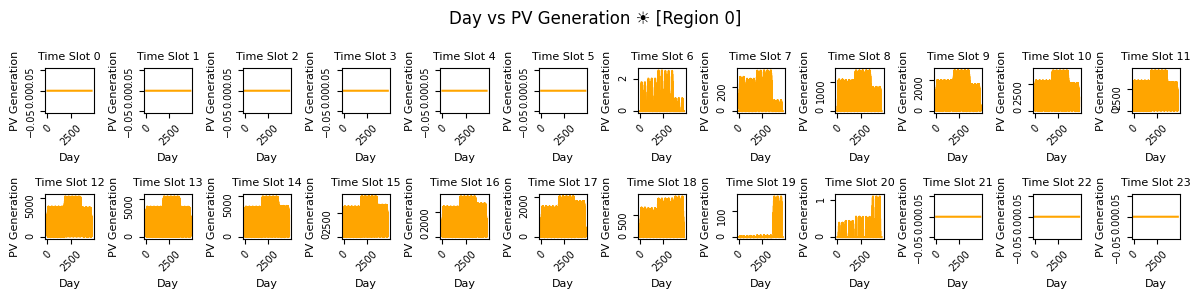

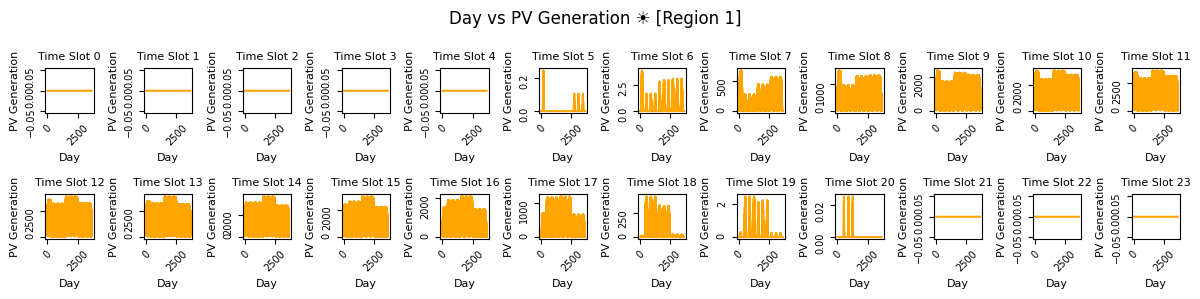

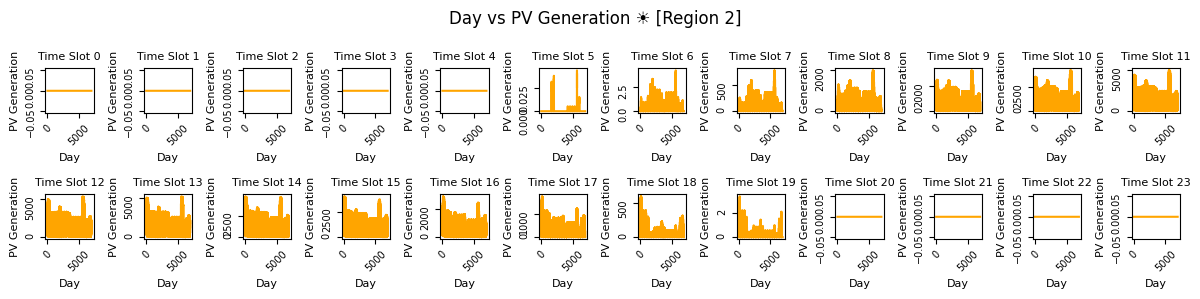

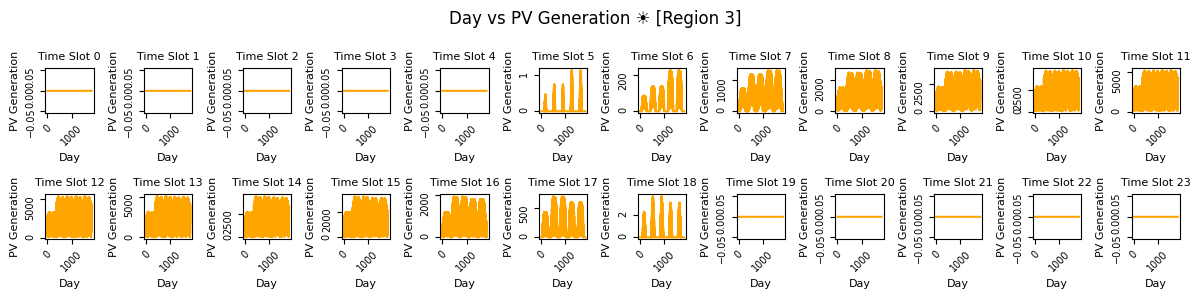

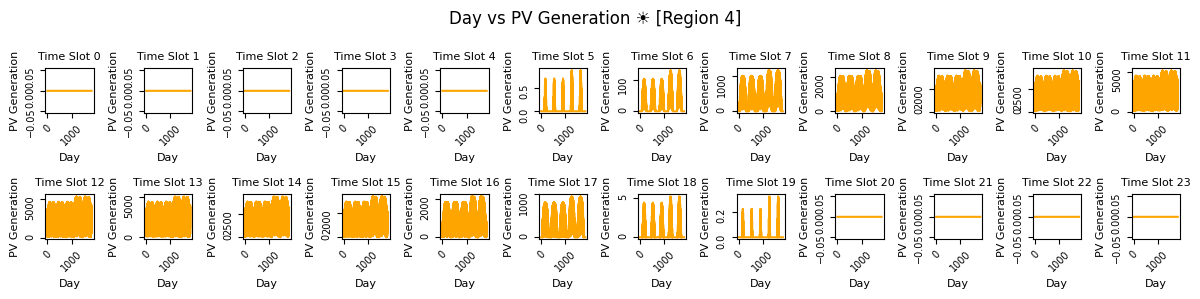

In [55]:
viz = [plt.subplots(nrows=2, ncols=12, figsize=(12, 3)) for _ in range(len(regions))]

for v in range(len(viz)):
    fig, axes = viz[v]
    k = 0
    for i in range(2):
        for j in range(12):
            sns.lineplot(data=X_viz_list[v], x=X_viz_list[v].index, y=f'Time period {k}', ax=axes[i, j], color='orange')
            axes[i,j].set_title(f'Time Slot {k}', fontsize=8)
            axes[i,j].set_xlabel('Day', fontsize=8)
            axes[i,j].set_ylabel('PV Generation', fontsize=8)
            k += 1

    for ax in axes.flat:
        ax.tick_params(axis='x', rotation=45, labelsize=7)
        ax.tick_params(axis='y', rotation=90, labelsize=7)

    fig.subplots_adjust(wspace=1, hspace=1.5)
    fig.suptitle('Day vs PV Generation ☀️ [Region '+str(v)+']')
    fig.tight_layout();

In [77]:
X_viz_list_series = [x.drop(regions, axis=1) for x in X_viz_list]
flattened = [pd.Series(x.values.flatten()) for x in X_viz_list]

In [78]:
for i in range(len(regions)):
    flattened[i] = pd.to_numeric(flattened[i], errors='coerce')

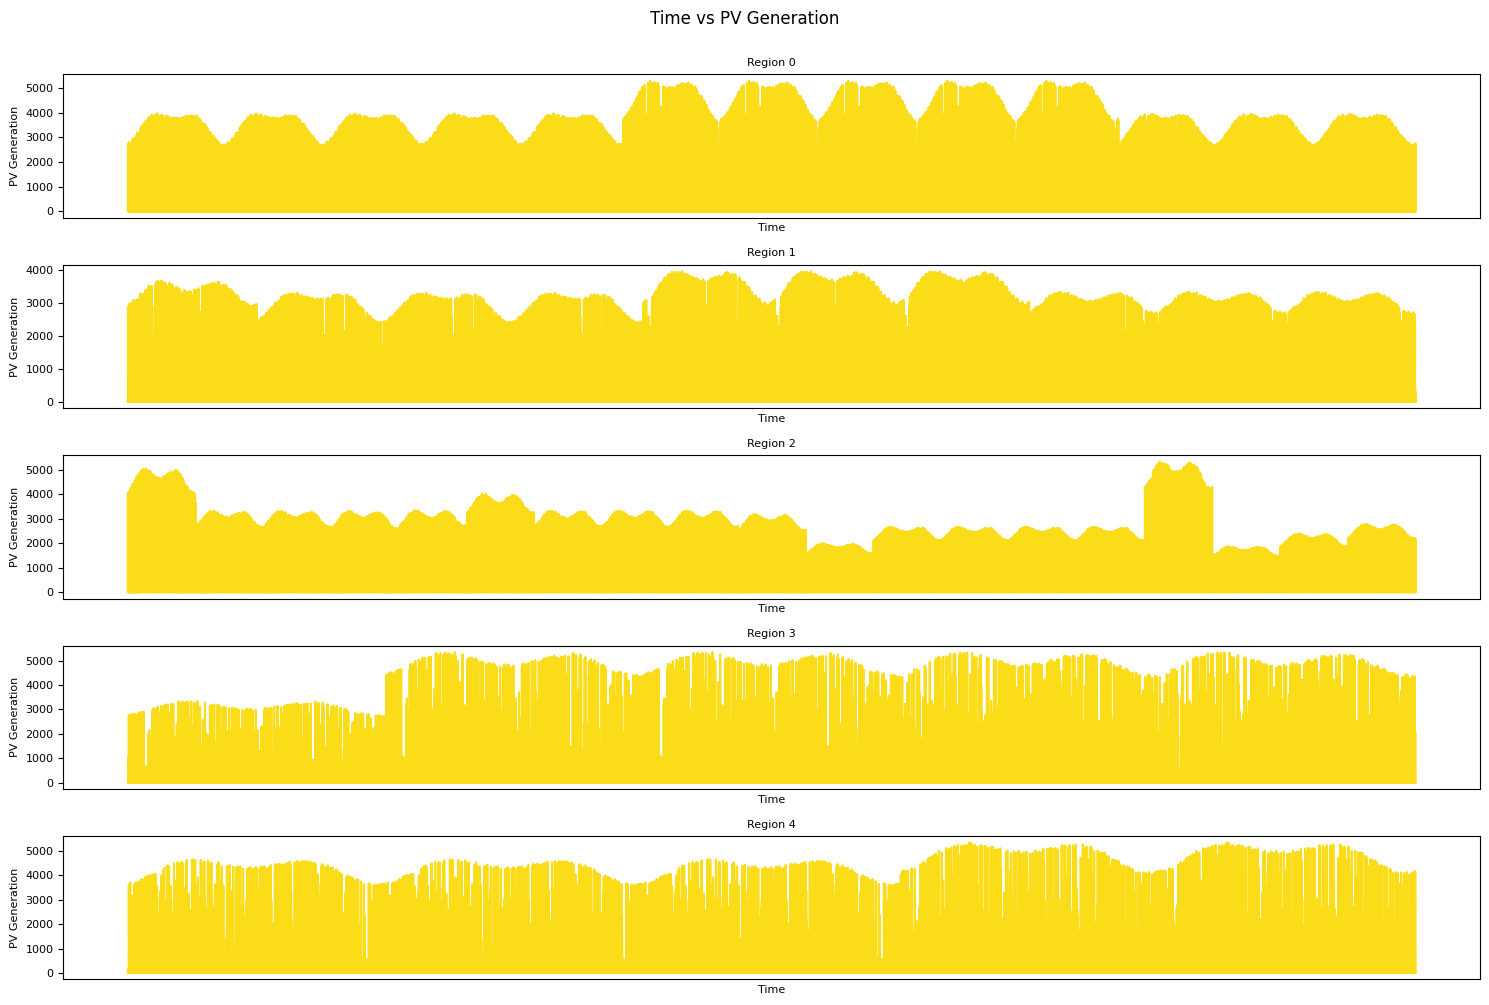

In [58]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(15, 10))

for i in range(len(regions)):
    sns.lineplot(x=flattened[i].index, y=flattened[i], ax=axes[i], color='#fadc19')
    axes[i].set_title(f'Region {i}', fontsize=8)
    axes[i].set_xlabel('Time', fontsize=8)
    axes[i].set_ylabel('PV Generation', fontsize=8)

for ax in axes.flat:
    ax.set_xticks([])
    ax.tick_params(axis='y', labelsize=8)

fig.subplots_adjust(wspace=1, hspace=2)
fig.suptitle('Time vs PV Generation', y=1)
fig.tight_layout();

# Training

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, SimpleRNN, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

In [68]:
checkpoint = ModelCheckpoint('best_time_series_solar.keras',
                                monitor='val_loss',
                                save_best_only=True,
                                mode='min')

In [79]:
def flattened_to_matrix(flat, window_size):
  X, y = [], []
  for i in range(len(flat) - window_size):
    row = [[x] for x in flat[i : i+window_size]]
    X.append(row)
    y.append(flat[i+window_size])
  return X,y

In [80]:
def windowing(arr, window_size):
  X, y = flattened_to_matrix(arr, window_size)
  X, y = np.array(X), np.array(y)

  a = X.shape[0]
  X_train, y_train = X[:int(0.8*a)], y[:int(0.8*a)]
  X_val, y_val = X[int(0.8*a):int(0.9*a)], y[int(0.8*a):int(0.9*a)]
  X_test, y_test = X[int(0.9*a):], y[int(0.9*a):]
  return X_train, y_train, X_val, y_val, X_test, y_test

In [102]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
flattened_scaled = scaler.fit_transform(flattened[0].values.reshape(-1, 1)).flatten()

X_train, y_train, X_val, y_val, X_test, y_test = windowing(flattened_scaled, 60)

In [106]:
model = Sequential([
    LSTM(70, input_shape=(X_train.shape[1], 1)),
    Dropout(0.1),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate = .0001), loss='mse')
history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_val,y_val), callbacks=[checkpoint])

Epoch 1/10
7115/7115 [==============================] - 389s 54ms/step - loss: 0.0077 - val_loss: 0.0022
Epoch 2/10
7115/7115 [==============================] - 353s 50ms/step - loss: 0.0022 - val_loss: 0.0011
Epoch 3/10
7115/7115 [==============================] - 355s 50ms/step - loss: 0.0015 - val_loss: 8.7545e-04
Epoch 4/10
7115/7115 [==============================] - 269s 38ms/step - loss: 0.0014 - val_loss: 7.6172e-04
Epoch 5/10
7115/7115 [==============================] - 253s 36ms/step - loss: 0.0013 - val_loss: 8.2820e-04
Epoch 6/10
7115/7115 [==============================] - 254s 36ms/step - loss: 0.0013 - val_loss: 7.2669e-04
Epoch 7/10
7115/7115 [==============================] - 252s 35ms/step - loss: 0.0012 - val_loss: 7.1284e-04
Epoch 8/10
7115/7115 [==============================] - 254s 36ms/step - loss: 0.0012 - val_loss: 7.4035e-04
Epoch 9/10
7115/7115 [==============================] - 223s 31ms/step - loss: 0.0012 - val_loss: 7.3185e-04
Epoch 10/10
7115/7115 [====

In [ ]:
from keras.models import load_model
model = load_model('best_time_series_solar.keras')
model.compile(optimizer=Adam(learning_rate = 0.0001), loss='mse')
model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_val,y_val), callbacks=[checkpoint])

# Predictions

In [113]:
y_pred = model.predict(X_test)
y_pred_original = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()

445/445 [==============================] - 5s 12ms/step


In [125]:
y_pred_plot = y_pred_original[::100]
y_test_plot = y_test[::100]
y_test_plot = scaler.inverse_transform(y_test_plot.reshape(-1, 1)).flatten()

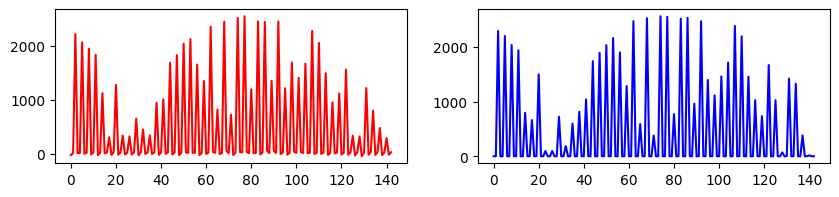

In [126]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(10,2))
sns.lineplot(y_pred_plot, color='red', ax=axes[0]);
sns.lineplot(y_test_plot, color='blue', ax=axes[1]);